In [ ]:
import numpy as np #Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_104 = pd.read_csv(r"https://drive.google.com/file/d/1leAdk6TelDtti13cG9iDbNMXut0eHX2m/view?usp=drive_link")
dataset_152 = pd.read_csv(r"https://drive.google.com/file/d/1eNWC717ovh4G1E-mH0nlnhZxGiYMahY3/view?usp=drive_link")
dataset_279 = pd.read_csv(r'https://drive.google.com/file/d/1mg0QXWZIYP5iRapWtGi9riHwwrXIBLd1/view?usp=drive_link')

dataset_104 = dataset_104.rename({' cid': 'cid'}, axis = 1)
dataset_152 = dataset_152.rename({' cid': 'cid'}, axis = 1)
dataset_279 = dataset_279.rename({' cid': 'cid'}, axis = 1) #correct column label

In [ ]:
combined_surfactants = pd.concat([dataset_104, dataset_152, dataset_279])
combined_surfactants = combined_surfactants.drop_duplicates()

In [ ]:
all_molecules = pd.read_csv(r'https://drive.google.com/file/d/1Fq0ogGuOBGTKIIuqGUlCcaj1_XXOD_yc/view?usp=drive_link')

all_molecules.shape[0] #324493 rows

all_molecules_cid = all_molecules['cid']

combined_surfactants_cid = combined_surfactants['cid']

all_molecules_minus_surfactants= pd.concat([all_molecules_cid, combined_surfactants_cid]).drop_duplicates(keep=False)

all_molecules_minus_surfactants.to_csv('all_molecules_minus_surfactants', index=False, header=False) #save CID values for 324,483 non surfactants to csv



C:\Users\angus\AppData\Local\Temp\ipykernel_13640\2778671754.py:1: DtypeWarning: Columns (31,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  all_molecules = pd.read_csv(r"C:\Users\angus\OneDrive\Documents\Data Science\691 Capstone\Datasets\all_molecules.csv")


In [ ]:
all_molecules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324493 entries, 0 to 324492
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cid                     324493 non-null  int64  
 1   cmpdname                324493 non-null  object 
 2   cmpdsynonym             320337 non-null  object 
 3   mw                      324493 non-null  float64
 4   mf                      324493 non-null  object 
 5   polararea               324493 non-null  float64
 6   complexity              324493 non-null  float64
 7   xlogp                   297654 non-null  float64
 8   heavycnt                324493 non-null  int64  
 9   hbonddonor              324493 non-null  int64  
 10  hbondacc                324493 non-null  int64  
 11  rotbonds                324493 non-null  int64  
 12  inchi                   324493 non-null  object 
 13  isosmiles               324493 non-null  object 
 14  canonicalsmiles     

In [ ]:
combined_surfactants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 0 to 278
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cid                     286 non-null    int64  
 1   cmpdname                286 non-null    object 
 2   cmpdsynonym             284 non-null    object 
 3   mw                      286 non-null    float64
 4   mf                      286 non-null    object 
 5   polararea               286 non-null    float64
 6   complexity              286 non-null    float64
 7   xlogp                   164 non-null    float64
 8   heavycnt                286 non-null    int64  
 9   hbonddonor              286 non-null    int64  
 10  hbondacc                286 non-null    int64  
 11  rotbonds                286 non-null    int64  
 12  inchi                   286 non-null    object 
 13  isosmiles               286 non-null    object 
 14  canonicalsmiles         286 non-null    object 

In [ ]:
all_molecules['surfactant'] = False
combined_surfactants['surfactant'] = True

combined_molecules = pd.concat([all_molecules, combined_surfactants])
combined_molecules = combined_molecules.drop_duplicates()

combined_molecules.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324779 entries, 0 to 278
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cid                     324779 non-null  int64  
 1   cmpdname                324779 non-null  object 
 2   cmpdsynonym             320621 non-null  object 
 3   mw                      324779 non-null  float64
 4   mf                      324779 non-null  object 
 5   polararea               324779 non-null  float64
 6   complexity              324779 non-null  float64
 7   xlogp                   297818 non-null  float64
 8   heavycnt                324779 non-null  int64  
 9   hbonddonor              324779 non-null  int64  
 10  hbondacc                324779 non-null  int64  
 11  rotbonds                324779 non-null  int64  
 12  inchi                   324779 non-null  object 
 13  isosmiles               324779 non-null  object 
 14  canonicalsmiles         3247

In [ ]:
matrix = combined_molecules.corr(numeric_only=True)

In [ ]:
from scipy.stats import pointbiserialr #wanted to check corr() function was working with binary surfactant variable. Checked pointbiserialr() function with the surfactant variable and a couple of the other continuous variables and got the same values.

correlation, p_value = pointbiserialr(combined_molecules['surfactant'], combined_molecules['mw'])

print("Point-biserial correlation:", correlation)
print("P-value:", p_value)

Point-biserial correlation: -0.003954583913182297
P-value: 0.024215476220827988


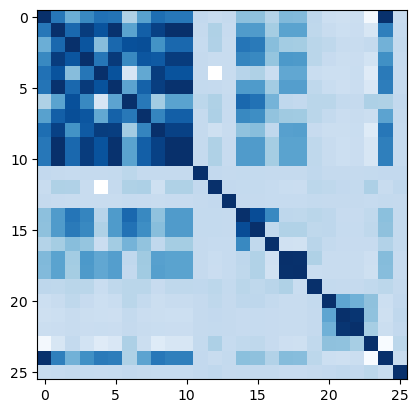

In [ ]:
plt.imshow(matrix, cmap='Blues')

In [ ]:
equal_amounts = pd.concat([(all_molecules.iloc[:285]), combined_surfactants])  #select first 286 non-surfactants and combine with dataframe of 286 surfactants.
#Want to check correlation matrix when equal amounbts of surfactants and non-surfactants

matrix_equal = equal_amounts.corr(numeric_only=True)

matrix_equal

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,...,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt,cidcdate,surfactant
cid,1.000000,0.315718,0.144295,0.214133,0.263493,0.313197,0.060333,0.220169,0.347699,0.315619,...,0.134807,0.360936,0.317562,0.171035,-0.068893,-0.078448,-0.060055,-0.319203,0.984443,0.311003
mw,0.315718,1.000000,0.860664,0.948254,0.019254,0.997187,0.722660,0.881670,0.878939,1.000000,...,0.189207,0.222043,0.230126,0.057263,-0.133614,-0.129689,-0.109946,-0.349302,0.363959,0.368546
polararea,0.144295,0.860664,1.000000,0.920969,-0.357488,0.862149,0.931433,0.924795,0.681676,0.860802,...,0.260774,0.103325,0.114495,0.016428,-0.076334,-0.101230,-0.085526,-0.212920,0.175057,0.062328
complexity,0.214133,0.948254,0.920969,1.000000,-0.127178,0.954289,0.822685,0.875929,0.747385,0.948337,...,0.183262,0.132457,0.138251,0.032819,-0.077670,-0.084582,-0.069148,-0.243803,0.250413,0.205820
xlogp,0.263493,0.019254,-0.357488,-0.127178,1.000000,0.029277,-0.425401,-0.255670,0.211776,0.019124,...,-0.184893,0.422180,0.376776,0.198881,-0.089314,-0.023281,-0.021643,-0.117990,0.285713,0.532801
heavycnt,0.313197,0.997187,0.862149,0.954289,0.029277,1.000000,0.726695,0.878741,0.878121,0.997199,...,0.179854,0.223873,0.231391,0.058608,-0.127813,-0.125091,-0.106180,-0.337707,0.360205,0.358339
hbonddonor,0.060333,0.722660,0.931433,0.822685,-0.425401,0.726695,1.000000,0.761325,0.542142,0.722792,...,0.234755,0.039835,0.059547,-0.014915,-0.051940,-0.070043,-0.059579,-0.123763,0.080835,-0.027611
hbondacc,0.220169,0.881670,0.924795,0.875929,-0.255670,0.878741,0.761325,1.000000,0.739573,0.881788,...,0.321518,0.160749,0.166712,0.041303,-0.107512,-0.127214,-0.105988,-0.288338,0.259575,0.136797
rotbonds,0.347699,0.878939,0.681676,0.747385,0.211776,0.878121,0.542142,0.739573,1.000000,0.878924,...,0.043687,0.352274,0.342420,0.122131,-0.134784,-0.112245,-0.095894,-0.322780,0.390738,0.452392
exactmass,0.315619,1.000000,0.860802,0.948337,0.019124,0.997199,0.722792,0.881788,0.878924,1.000000,...,0.189243,0.221986,0.230066,0.057251,-0.133565,-0.129667,-0.109927,-0.349237,0.363847,0.368386


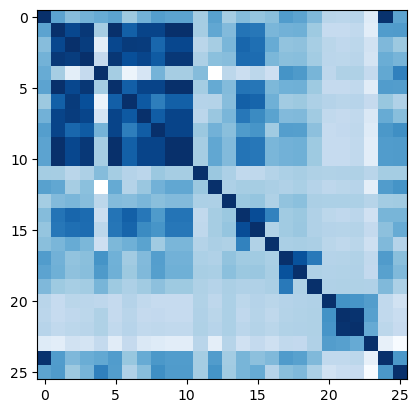

In [ ]:
plt.imshow(matrix_equal, cmap='Blues')

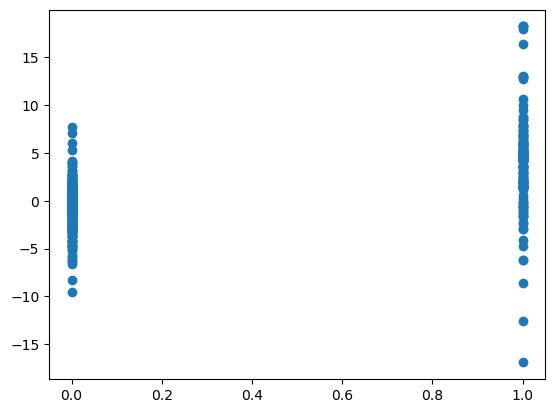

In [ ]:
plt.scatter(equal_amounts['surfactant'], equal_amounts['xlogp'])
plt.show()

In [ ]:
import scipy.stats as stats

correlation, p_value = stats.pointbiserialr(equal_amounts['surfactant'], equal_amounts['annothitcnt'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: -0.505816407874183
P-value: 2.0201521679097258e-38
